##**Recognizing Handwritten Digits**

**Importing Dataset and Libraries**

In [ ]:
# importing libraries
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Loading dataset
digits = datasets.load_digits()

digits.data.size

115008

The data size is 115008, but group of 64(8x8) elements represent single digits , so there are 115008/64 = 1797 digits.

**Lets see how this digits look**

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

*   This is a single element from an array
*   The images of the handwritten digits are contained in a digits.images array.
*   Each element of this array is an image that is represented by an 8x8 matrix of numerical values that correspond to a grayscale from white, with a value of 0, to black, with the value 15


In [4]:
# target that contains actual result i.e. the numerical values
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
# target size
digits.target.size

1797

We can see that target size as 1797. It reprsents the numerical value for each elemet from digits.images

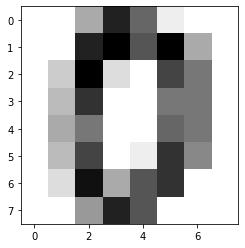

In [6]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

**Divide the dataset into train and test dataset**

This dataset contains 1,797 elements, and so you can consider the first 1,791 as a training set and will use the last six as a validation set

In [7]:
X_train = digits.data[0:1791]
Y_train = digits.target[0:1791]
X_test = digits.data[1791:1797]
Y_test = digits.target[1791:1797]

In [8]:
print(X_train.size,Y_train.size,X_test.size,Y_test.size)

114624 1791 384 6


**Testing data set looks**

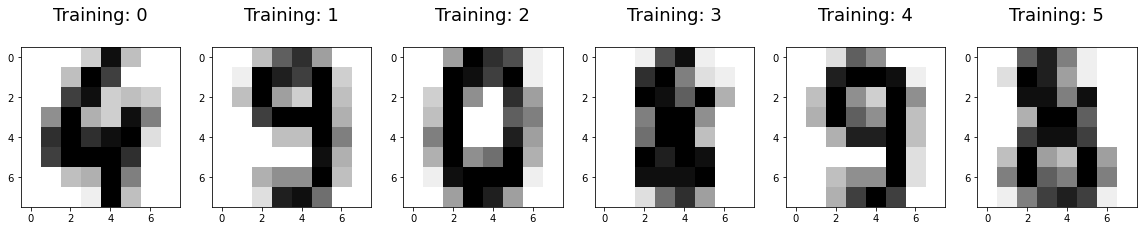

In [9]:
plt.figure(figsize=(20,4))
for i in range(Y_test.size):
    plt.subplot(161+i)
    plt.imshow(digits.images[1791+i], cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Training: %i\n' % i,fontsize=18)

In [10]:
svc = SVC(gamma=0.001, C=100.)

In [11]:
# Fiiting the model and predicting the result
svc.fit(X_train,Y_train)
predict = svc.predict(X_test)
svc.score(X_test,Y_test)

1.0

**Here we got 100% accuracy,**


**To test the hypothesis, we will use three different size for train and test data**

**1] Train and test divided in the ratio 9:1**

In [12]:
# divide data set into 9:1 ratio
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.1, random_state=0)

#check the size of train and test
print("Data set divided in ratio 9:1")
print("X_train :",X_train.size,"\tY_train :",Y_train.size,"\nX_test :",X_test.size,"\tY_test :",Y_test.size)

#fitting and predicting
svc.fit(X_train,Y_train)
predict = svc.predict(X_test)
score_1=svc.score(X_test,Y_test)
print("Accuracy : ",score_1)

Data set divided in ratio 9:1
X_train : 103488 	Y_train : 1617 
X_test : 11520 	Y_test : 180
Accuracy :  0.9888888888888889


**Classification Report**

In [13]:
print(f"Classification report for classifier SVC :\n"f"{classification_report(Y_test, predict)}\n")

Classification report for classifier SVC :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        20
           8       1.00      0.96      0.98        23
           9       1.00      0.96      0.98        24

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180




**2] Train and test divided in the ratio 8:2**

In [14]:
# divide data set into 9:1 ratio
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

#check the size of train and test
print("Data set divided in ratio 8:2")
print("X_train :",X_train.size,"\tY_train :",Y_train.size,"\nX_test :",X_test.size,"\tY_test :",Y_test.size)

#fitting and predicting
svc.fit(X_train,Y_train)
predict = svc.predict(X_test)
score_2 = svc.score(X_test,Y_test)
print("Accuracy : ",score_2)

Data set divided in ratio 8:2
X_train : 91968 	Y_train : 1437 
X_test : 23040 	Y_test : 360
Accuracy :  0.9916666666666667


**Classification Report**

In [15]:
print(f"Classification report for classifier SVC :\n" f"{classification_report(Y_test, predict)}\n")

Classification report for classifier SVC :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




**3] Train and test divided in the ratio 7:3**

In [16]:
# divide data set into 9:1 ratio
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

#check the size of train and test
print("Data set divided in ratio 7:3")
print("X_train :",X_train.size,"\tY_train :",Y_train.size,"\nX_test :",X_test.size,"\tY_test :",Y_test.size)

#fitting and predicting
svc.fit(X_train,Y_train)
predict = svc.predict(X_test)
score_3 = svc.score(X_test,Y_test)
print("Accuracy : ",score_3)

Data set divided in ratio 7:3
X_train : 80448 	Y_train : 1257 
X_test : 34560 	Y_test : 540
Accuracy :  0.9907407407407407


**Classification Report**

In [17]:
print(f"Classification report for classifier SVC :\n" f"{classification_report(Y_test, predict)}\n")

Classification report for classifier SVC :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       1.00      0.98      0.99        61
           9       0.98      0.98      0.98        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540




**4] Train and test divided in the ratio 6:4**

In [18]:
# divide data set into 9:1 ratio
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

#check the size of train and test
print("Data set divided in ratio 6:4")
print("X_train :",X_train.size,"\tY_train :",Y_train.size,"\nX_test :",X_test.size,"\tY_test :",Y_test.size)

#fitting and predicting
svc.fit(X_train,Y_train)
predict = svc.predict(X_test)
score_4 = svc.score(X_test,Y_test)
print("Accuracy : ",score_4)

Data set divided in ratio 6:4
X_train : 68992 	Y_train : 1078 
X_test : 46016 	Y_test : 719
Accuracy :  0.9874826147426982


**Classification Report**

In [19]:
print(f"Classification report for classifier SVC :\n" f"{classification_report(Y_test, predict)}\n")

Classification report for classifier SVC :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      1.00      0.97        73
           2       1.00      0.97      0.99        71
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        63
           5       0.99      0.97      0.98        89
           6       0.99      1.00      0.99        76
           7       0.98      1.00      0.99        65
           8       1.00      0.96      0.98        78
           9       0.97      0.99      0.98        74

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719




In [20]:
accuracy =[score_1,score_2,score_3,score_4]
size = ['9:1','8:2','7:3','6:4']

Text(0.5, 0, 'train test ratio')

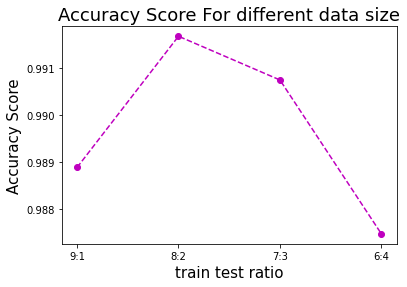

In [21]:
plt.plot(accuracy,'mo--')
plt.xticks([0, 1, 2, 3], size)
plt.title('Accuracy Score For different data size',fontsize = 18)
plt.ylabel('Accuracy Score',fontsize = 15)
plt.xlabel('train test ratio',fontsize = 15)

**We applied SVC model on different data size for training and testing purpose and we get accuracy Above 95%**<br>

**Hence , we have to accept the NULL HYPOTHESIS**